In [1]:
## Importing modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Reading Data
df = pd.read_csv("jee_records.csv")

In [3]:
# Basic Analysis 
df.head(2)

,id,startTime,duration,endTime,totalPausedTime,completed,stopped,type,tags
0,1,2024-07-22T22:13:00+05:30,3600.0,2024-07-22T23:13:00+05:30,0,Y,NaN,Work,Inorganic chemistry (ratta)
1,2,2024-07-23T01:01:25+05:30,4800.0,2024-07-23T02:21:25+05:30,0,Y,NaN,Work,Physic lec


In [4]:
df.shape

(1340, 9)

In [5]:
df.dtypes

id                   int64
startTime           object
duration           float64
endTime             object
totalPausedTime      int64
completed           object
stopped             object
type                object
tags                object
dtype: object

In [6]:
df.describe()

,id,duration,totalPausedTime
count,1340.000000,1340.000000,1340.000000
mean,708.106716,4150.334328,628.800746
std,397.496275,3391.973438,4333.743281
min,1.000000,62.000000,0.000000
25%,378.750000,1800.000000,0.000000
50%,714.500000,3606.500000,0.000000
75%,1050.250000,7200.000000,0.000000
max,1386.000000,86401.000000,84936.000000


In [7]:
# Total time given to work and rest (in mins)
df.groupby('type')['duration'].sum()

type
Rest      54600.0
Work    5506848.0
Name: duration, dtype: float64

In [8]:
# converting duration from mins to hours 
df['duration'] = df['duration']/3600
df.head(2)

,id,startTime,duration,endTime,totalPausedTime,completed,stopped,type,tags
0,1,2024-07-22T22:13:00+05:30,1.000000,2024-07-22T23:13:00+05:30,0,Y,NaN,Work,Inorganic chemistry (ratta)
1,2,2024-07-23T01:01:25+05:30,1.333333,2024-07-23T02:21:25+05:30,0,Y,NaN,Work,Physic lec


In [9]:
# Dropping Columns not require for analysis 
df.drop('totalPausedTime' ,axis=1, inplace=True)
df.drop('completed',axis=1 , inplace=True)
df.drop('stopped',axis=1 , inplace=True)
df.drop('endTime',axis=1 , inplace=True)

In [10]:
# Removing all the rows that consists of type = rest
mask = df['type'] == "Work"
df = df[mask]
df.head(5)

,id,startTime,duration,type,tags
0,1,2024-07-22T22:13:00+05:30,1.000000,Work,Inorganic chemistry (ratta)
1,2,2024-07-23T01:01:25+05:30,1.333333,Work,Physic lec
2,4,2024-07-23T02:21:00+05:30,0.181944,Work,Physic lec
4,5,2024-07-23T09:26:00+05:30,1.110556,Work,Inorganic chemistry (ratta)
5,6,2024-07-23T10:33:00+05:30,0.019444,Work,Inorganic chemistry (ratta)


In [11]:
df.fillna({"tags":"Misc"} , inplace=True)
df.shape

(1275, 5)

In [12]:
Total_duration = df['duration'].sum()
average_hours = Total_duration/213
print(average_hours)

7.1815962441314545


In [13]:
df.head(2)

,id,startTime,duration,type,tags
0,1,2024-07-22T22:13:00+05:30,1.000000,Work,Inorganic chemistry (ratta)
1,2,2024-07-23T01:01:25+05:30,1.333333,Work,Physic lec


In [14]:
# Total Test gave in six months 
mask_test = df['tags'] == "Test"
total_test = df[mask_test]
total_test_sum = total_test['duration'].sum()
total_test_gave = total_test_sum/3
print(total_test_gave)

63.69194444444444


In [15]:
# Total hours studied on the basis of each tags 
tags_seperation = df.groupby('tags')['duration'].sum().reset_index()
tags_data = tags_seperation.sort_values(by='duration' , ascending=False)

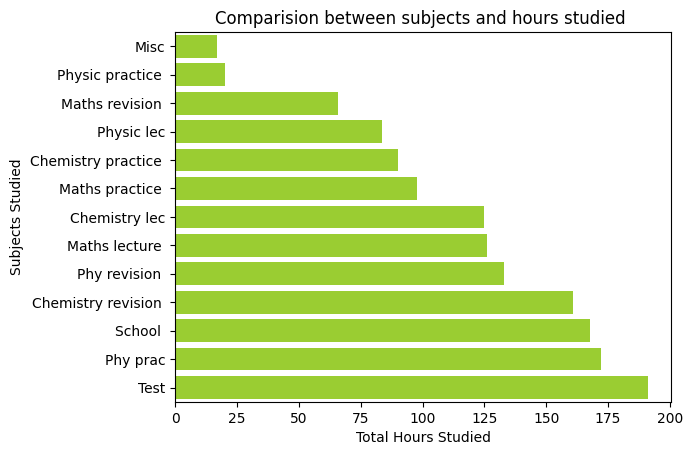

In [16]:
# Ploting data on the basis of tags and hours 
x_tags = tags_data['tags']
y_hours = tags_data['duration']
plt.xlabel("Total Hours Studied")
plt.ylabel("Subjects Studied")
plt.barh(x_tags , y_hours , color='yellowgreen')
plt.ylim(-0.5,12.5)
plt.title("Comparision between subjects and hours studied ")
plt.savefig('Total_hours_studied.png')
plt.show()

In [17]:
# Comparing Between Physic lecture , revision and practice 
mask1 = tags_data['tags'] == "Phy prac" 
mask2 = tags_data['tags'] == "Phy revision "
mask3 = tags_data['tags'] == "Physic lec"
phy_prac =tags_data[mask1]['duration'].sum()
phy_rev = tags_data[mask2]['duration'].sum()
phy_plec = tags_data[mask3]['duration'].sum()

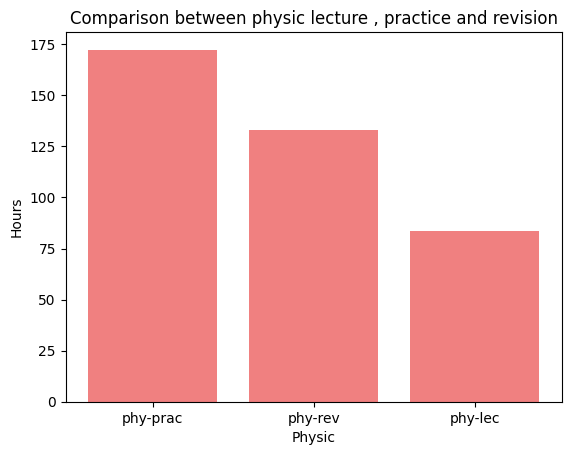

In [18]:
# Ploting bar graph for physic lec vs revision vs practice 
a = ["phy-prac" , "phy-rev" ,  "phy-lec"]
c = [phy_prac ,phy_rev ,phy_plec]
plt.bar(a,c , color='lightcoral')
plt.xlabel("Physic")
plt.ylabel("Hours")
plt.title("Comparison between physic lecture , practice and revision")
plt.savefig('Total_hours_studied_physic.png')
plt.show()

In [19]:
# Comparing Between chemistry lecture , revision and practice 
mask1 = tags_data['tags'] == "Chemistry practice " 
mask2 = tags_data['tags'] == "Chemistry revision "
mask3 = tags_data['tags'] == "Chemistry lec"
chemistry_prac =tags_data[mask1]['duration'].sum()
chemistry_rev = tags_data[mask2]['duration'].sum()
chemistry_plec = tags_data[mask3]['duration'].sum()

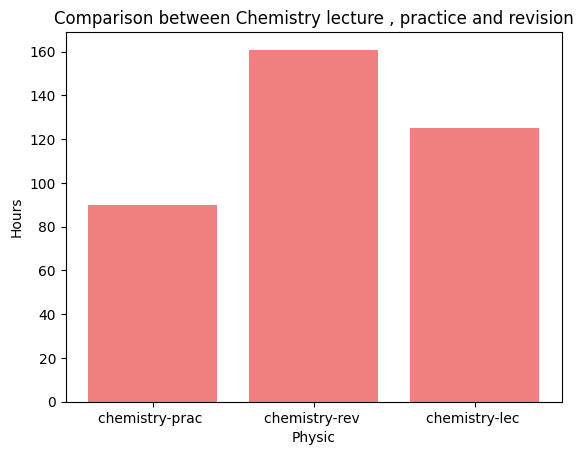

In [20]:
a = ["chemistry-prac " , "chemistry-rev " ,  "chemistry-lec "]
c = [chemistry_prac ,chemistry_rev ,chemistry_plec]
plt.bar(a,c , color='lightcoral')
plt.xlabel("Physic")
plt.ylabel("Hours")
plt.title("Comparison between Chemistry lecture , practice and revision")
plt.savefig('Total_hours_studied_chemistry.png')
plt.show()

In [21]:
# Comparing Between chemistry lecture , revision and practice 
mask1 = tags_data['tags'] == "Maths practice " 
mask2 = tags_data['tags'] == "Maths revision "
mask3 = tags_data['tags'] == "Maths lecture "
maths_prac =tags_data[mask1]['duration'].sum()
maths_rev = tags_data[mask2]['duration'].sum()
maths_lec = tags_data[mask3]['duration'].sum()

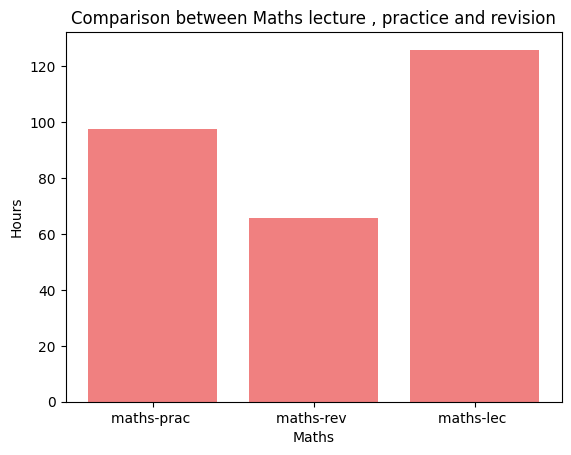

In [22]:
a = ["maths-prac " , "maths-rev " ,  "maths-lec "]
c = [maths_prac ,maths_rev ,maths_lec]
plt.bar(a,c , color='lightcoral')
plt.xlabel("Maths")
plt.ylabel("Hours")
plt.title("Comparison between Maths lecture , practice and revision")
plt.savefig('Total_hours_studied_maths.png')
plt.show()

In [23]:
# Total Time given to school 
mask = tags_data['tags'] == "School "
total_school = tags_data[mask]
total_school

,tags,duration
28,School,167.599444


In [24]:
# Filtering database on the basis of particular month 
mask1 = df['startTime'] > "2024-08-01T00:00:01+05:30"
mask2 = df['startTime'] < "2024-08-31T23:59:01+05:30"
a = df[mask1 & mask2]['duration'].sum()
k = df[mask1 & mask2]

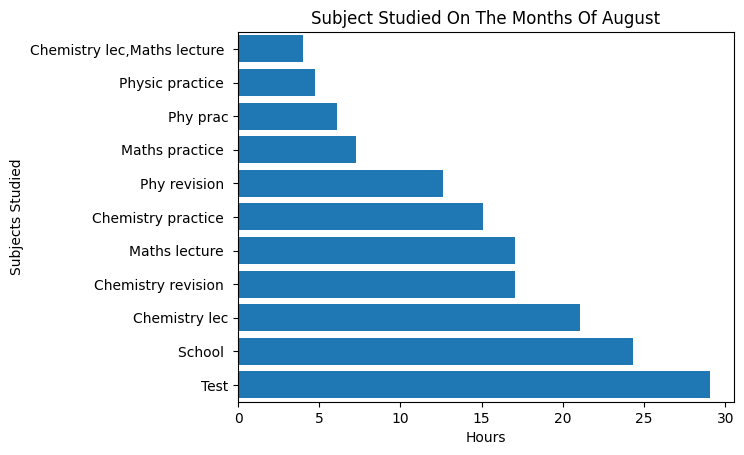

In [25]:
# Plotting values on the basis of particular month
g= k.groupby('tags')['duration'].sum().reset_index()
g = g.sort_values('duration' , ascending=False )
x_mo = g['tags']
y_mo = g['duration']
plt.barh(x_mo , y_mo)
plt.ylim(-0.5,10.5)
plt.xlabel("Hours")
plt.ylabel("Subjects Studied")
plt.title("Subject Studied On The Months Of August")
plt.savefig('Total_hours_studied_august.png')
plt.show()

In [26]:
mask1 = df['tags'] == "Chemistry lec" 
mask2 = df['tags'] == "Maths lecture"
mask3 = df['tags'] == "Physic lec"
total_lec1 =df[mask1]['duration'].sum()
total_lec2 =df[mask2]['duration'].sum()
total_lec3 =df[mask3]['duration'].sum()
v = total_lec1 + total_lec2 + total_lec3


In [27]:
mask1 = df['tags'] == "Chemistry revision " 
mask2 = df['tags'] == "Maths revision "
mask3 = df['tags'] == "Physic revision "
total_lec1 =df[mask1]['duration'].sum()
total_lec2 =df[mask2]['duration'].sum()
total_lec3 =df[mask3]['duration'].sum()
g = total_lec1 + total_lec2 + total_lec3

In [28]:
mask1 = df['tags'] == "Chemistry practice " 
mask2 = df['tags'] == "Maths practice "
mask3 = df['tags'] == "Physic practice "
total_lec1 =df[mask1]['duration'].sum()
total_lec2 =df[mask2]['duration'].sum()
total_lec3 =df[mask3]['duration'].sum()
p = total_lec1 + total_lec2 + total_lec3

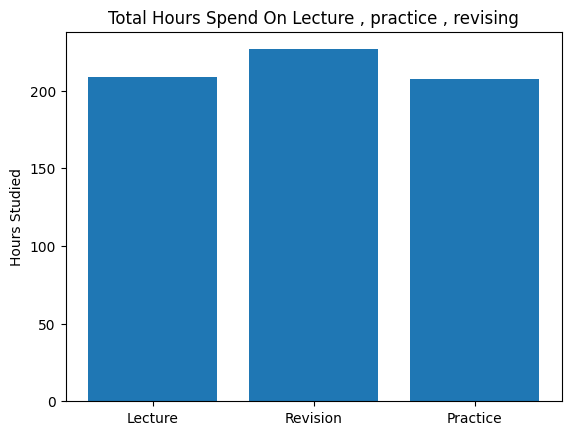

In [29]:
top = ["Lecture" , "Revision" , "Practice"]
cg = [v,g,p]
plt.bar(top , cg)
plt.savefig('Total_hours_studied_lec_rev_prac.png')
plt.ylabel("Hours Studied")
plt.title("Total Hours Spend On Lecture , practice , revising")
plt.show()

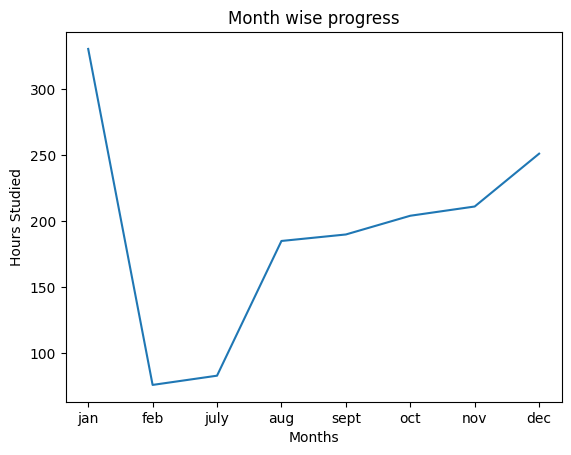

In [32]:
# Months Wise Data Plotting 
months_wise_data = df['startTime'].str.slice(5,7)
labels = ['jan' , 'feb' , 'july' , 'aug' , 'sept' , 'oct' , 'nov' , 'dec']
month_wise_plotting = df.groupby(months_wise_data)['duration'].sum()
plt.xlabel("Months")
plt.ylabel("Hours Studied")
plt.title("Month wise progress")
plt.plot(labels , month_wise_plotting)
plt.savefig('Total_hours_studied_monthwise.png')